<a href="https://colab.research.google.com/github/woraphonp-038-5/Project_Dashboard_BasicPrograming/blob/main/Stop_And_SearchF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import os

# **Stop And Search**

In [3]:
folder_paths = [
    '/content/drive/MyDrive/Python&DataViz2025/Data/2025-01',
    '/content/drive/MyDrive/Python&DataViz2025/Data/2025-02',
    '/content/drive/MyDrive/Python&DataViz2025/Data/2025-03',
    '/content/drive/MyDrive/Python&DataViz2025/Data/2025-04',
    '/content/drive/MyDrive/Python&DataViz2025/Data/2025-05'
]

stopandsearch_files = []

# Loop through each folder path
for folder_path in folder_paths:
    # Loop through all files in the folder
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if '-stop-and-search' in file and file.endswith(".csv"):
                file_path = os.path.join(root, file)
                df = pd.read_csv(file_path)

                # ดึงชื่อเมืองจากชื่อไฟล์
                city_name = file.replace('-stop-and-search.csv', ''
                ).replace('2025-01-', ''
                ).replace('2025-02-', ''
                ).replace('2025-03-', ''
                ).replace('2025-04-', ''
                ).replace('2025-05-', '')

                df['Police Force'] = city_name

                stopandsearch_files.append(df)

In [4]:
# รวมทุก DataFrame
if stopandsearch_files:
    combined_stopandsearch_files_df = pd.concat(stopandsearch_files, ignore_index=True)

    # แปลงคอลัมน์ Date เป็น datetime และเพิ่มวันในสัปดาห์
    combined_stopandsearch_files_df['Date'] = pd.to_datetime(combined_stopandsearch_files_df['Date'])
    combined_stopandsearch_files_df['Day_of_Week'] = combined_stopandsearch_files_df['Date'].dt.day_name()

    # ทำให้ตัวอักษรตัวแรกเป็นตัวพิมพ์ใหญ่ และลบเครื่องหมายขีดกลาง (hyphen) ออกจากคอลัมน์ Police Force
    combined_stopandsearch_files_df['Police Force'] = combined_stopandsearch_files_df['Police Force'
    ].str.replace('-', ' ').str.title().str.replace('-', '')

    # สร้าง dictionary สำหรับแม็ปชื่อหน่วยงานตำรวจ กับ เมืองหลัก
    force_to_city = {
        "Avon And Somerset": "Bristol",
        "Bedfordshire": "Luton",
        "Btp": "London",
        "Cambridgeshire": "Cambridge",
        "Cheshire": "Chester",
        "City Of London": "London",
        "Cleveland": "Middlesbrough",
        "Cumbria": "Carlisle",
        "Derbyshire": "Derby",
        "Devon And Cornwall": "Exeter",
        "Dorset": "Bournemouth",
        "Durham": "Durham",
        "Dyfed Powys": "Carmarthen",
        "Essex": "Chelmsford",
        "Gloucestershire": "Gloucester",
        "Hampshire": "Winchester",
        "Hertfordshire": "St Albans",
        "Kent": "Maidstone",
        "Lancashire": "Preston",
        "Leicestershire": "Leicester",
        "Merseyside": "Liverpool",
        "Metropolitan": "London",
        "Norfolk": "Norwich",
        "North Wales": "Wrexham",
        "Northamptonshire": "Northampton",
        "Northumbria": "Newcastle upon Tyne",
        "Nottinghamshire": "Nottingham",
        "South Wales": "Cardiff",
        "South Yorkshire": "Sheffield",
        "Staffordshire": "Stoke-on-Trent",
        "Suffolk": "Ipswich",
        "Surrey": "Guildford",
        "Sussex": "Brighton",
        "Thames Valley": "Oxford",
        "Warwickshire": "Warwick",
        "West Mercia": "Worcester",
        "West Midlands": "Birmingham",
        "West Yorkshire": "Leeds"
    }

    # เพิ่มคอลัมน์ Main_City ลงใน DataFrame
    combined_stopandsearch_files_df["City"] = combined_stopandsearch_files_df["Police Force"].map(force_to_city)

    print(f"Read {len(stopandsearch_files)} files.")
    print(f"Combined DataFrame has {combined_stopandsearch_files_df.shape[0]} rows and {combined_stopandsearch_files_df.shape[1]} columns.")
else:
    print("Error")

Read 186 files.
Combined DataFrame has 155291 rows and 18 columns.


In [5]:
combined_stopandsearch_files_df.dropna(subset=['Date','Latitude','Longitude'], inplace=True)

In [6]:
combined_stopandsearch_files_df = combined_stopandsearch_files_df.fillna('Unknown').drop(
    columns=[
        'Policing operation',
        'Removal of more than just outer clothing',
        'Part of a policing operation'])

In [7]:
combined_stopandsearch_files_df.head()

,Type,Date,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Police Force,Day_of_Week,City
0,Person search,2025-01-01 00:04:09+00:00,51.427212,-0.529689,Female,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Community resolution,True,Surrey,Wednesday,Guildford
1,Person search,2025-01-01 00:49:03+00:00,51.337628,-0.744093,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,False,Surrey,Wednesday,Guildford
2,Vehicle search,2025-01-01 01:19:19+00:00,51.320714,-0.555397,Unknown,Unknown,Unknown,Unknown,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,Surrey,Wednesday,Guildford
3,Person search,2025-01-01 06:30:30+00:00,51.320102,-0.571474,Female,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,True,Surrey,Wednesday,Guildford
4,Person search,2025-01-01 07:09:47+00:00,51.243975,-0.195881,Female,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Arrest,True,Surrey,Wednesday,Guildford


In [9]:
combined_stopandsearch_files_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135800 entries, 0 to 155290
Data columns (total 15 columns):
 #   Column                              Non-Null Count   Dtype              
---  ------                              --------------   -----              
 0   Type                                135800 non-null  object             
 1   Date                                135800 non-null  datetime64[ns, UTC]
 2   Latitude                            135800 non-null  float64            
 3   Longitude                           135800 non-null  float64            
 4   Gender                              135800 non-null  object             
 5   Age range                           135800 non-null  object             
 6   Self-defined ethnicity              135800 non-null  object             
 7   Officer-defined ethnicity           135800 non-null  object             
 8   Legislation                         135800 non-null  object             
 9   Object of search               

In [10]:
counts = combined_stopandsearch_files_df.groupby('Date').size().reset_index(name='Count')
display(counts)

,Date,Count
0,2025-01-01 00:00:00+00:00,26
1,2025-01-01 00:01:00+00:00,10
2,2025-01-01 00:02:00+00:00,5
3,2025-01-01 00:04:09+00:00,1
4,2025-01-01 00:05:00+00:00,1
...,...,...
79307,2025-05-31 23:46:26+00:00,1
79308,2025-05-31 23:47:36+00:00,1
79309,2025-05-31 23:48:03+00:00,1
79310,2025-05-31 23:49:08+00:00,1


In [11]:
display(monthly_counts)

NameError: name 'monthly_counts' is not defined

In [14]:
# Create a monthly_counts DataFrame from the counts DataFrame
counts['Month'] = counts['Date'].dt.strftime('%B')
monthly_counts = counts.groupby('Month').size().reindex(['January', 'February', 'March', 'April', 'May'], fill_value=0).reset_index(name='Count')
display(monthly_counts)

,Month,Count
0,January,17573
1,February,17149
2,March,14262
3,April,13359
4,May,16969


In [16]:
import plotly.express as px
# 1. กำหนดพจนานุกรมของสีที่คุณต้องการ สำหรับ 5 เดือนเท่านั้น
# รูปแบบ: {'ชื่อเดือน': 'รหัสสี HEX หรือชื่อสีภาษาอังกฤษ'}
custom_color_map = {
    'January': '#1f77b4',   # น้ำเงิน
    'February': '#ff7f0e',  # ส้ม
    'March': '#2ca02c',     # เขียว
    'April': '#d62728',     # แดง
    'May': '#9467bd'        # ม่วง
}

# Add a month name column to the monthly_counts DataFrame
# *โค้ดเดิมของคุณ:* monthly_counts['Month'] = monthly_counts['Date'].dt.strftime('%B')

# Create a histogram of monthly counts
fig_monthly_histogram = px.bar(
    monthly_counts,
    x='Month',
    y='Count',
    title='จำนวนการตรวจค้นรายเดือน (Monthly Stop and Searches)',
    labels={'Month': 'เดือน', 'Count': 'จำนวนการตรวจค้น'},
    template='plotly_white',
    color='Month',
    # ------------------------------------------------------------------
    # ใช้ color_discrete_map ที่กำหนดไว้ 5 เดือน
    # ------------------------------------------------------------------
    color_discrete_map=custom_color_map
)

# Adjust bar width (optional, can be done via update_traces)
fig_monthly_histogram.update_traces(width=0.6)

# Show the histogram
fig_monthly_histogram.show()

In [21]:
# นับจำนวนเหตุการณ์ Stop and Search ในแต่ละเมือง
city_counts = combined_stopandsearch_files_df['City'].value_counts()

# แสดง 10 อันดับเมืองที่มีจำนวนน้อยที่สุด
print("\nBottom 10 Cities with the Least Stop and Search Incidents:")
display(city_counts.tail(5))


print("Top 5 Cities with the Most Stop and Search Incidents:")
display(city_counts.head(5))


Bottom 10 Cities with the Least Stop and Search Incidents:


,count
City,
Durham,1144
Ipswich,1083
Norwich,991
Gloucester,826
Bournemouth,607


Top 5 Cities with the Most Stop and Search Incidents:


,count
City,
London,20887
Liverpool,18183
Birmingham,11659
Maidstone,6982
Leeds,6695


/tmp/ipython-input-1040106034.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




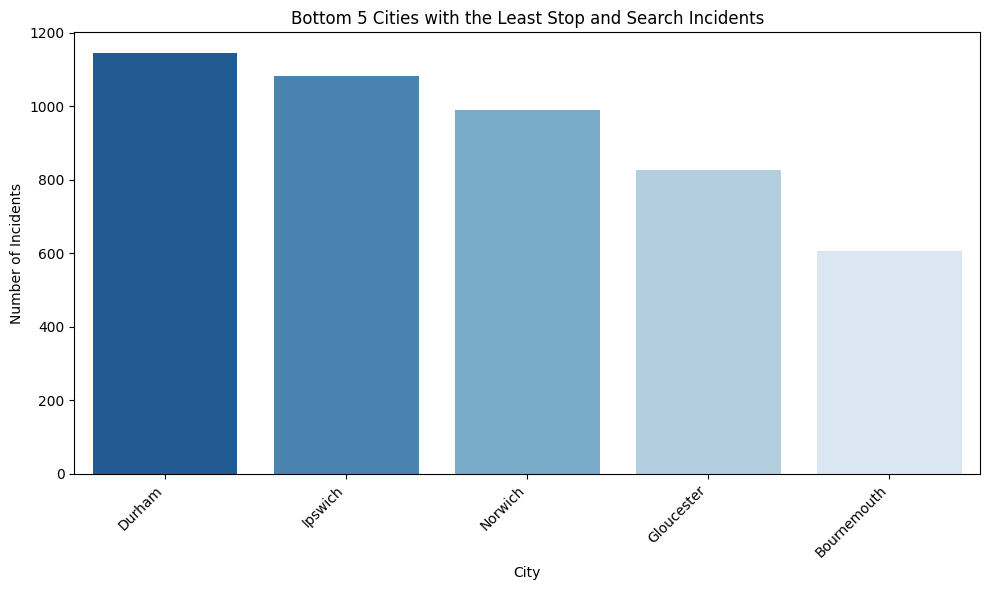

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the bottom 5 cities with the least stop and search incidents
bottom_5_cities = city_counts.tail(5)

# Create a bar plot with a red color palette
plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_5_cities.index, y=bottom_5_cities.values, palette='Blues_r') # Using a blue palette for least incidents
plt.title('Bottom 5 Cities with the Least Stop and Search Incidents')
plt.xlabel('City')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

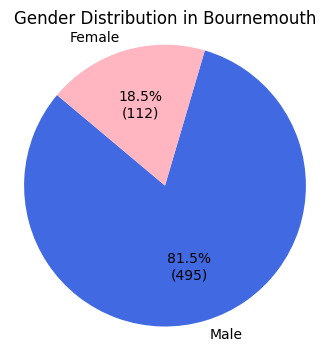

In [33]:
import matplotlib.pyplot as plt

# Filter data for Bournemouth
bournemouth_data = combined_stopandsearch_files_df[combined_stopandsearch_files_df['City'] == 'Bournemouth'].copy()

# Count gender distribution for Bournemouth
gender_counts_bournemouth = bournemouth_data['Gender'].value_counts()

# Calculate the total number of individuals
total_individuals = gender_counts_bournemouth.sum()

# Define colors for the pie chart (you can change these)
colors = ['royalblue', 'lightpink', 'gray'] # Added a color for 'Unknown' or other genders

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(gender_counts_bournemouth, labels=gender_counts_bournemouth.index, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * total_individuals / 100), startangle=140, colors=colors)
plt.title('Gender Distribution in Bournemouth')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## ตอบนิดหน่อย

หากต้องการหลีกเลี่ยงการโดนตรวจค้นควรเลือกเมือง bournemouth เพราะ มีการตรวจค้นน้อยที่สุดโดยเฉาะผู้หญิงที่มีเปอร์เซ็นการโดนตรวจเพียง 18.5 % จาก 607 คน

```
# มีการจัดรูปแบบเป็นโค้ด
```



/tmp/ipython-input-1723059617.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




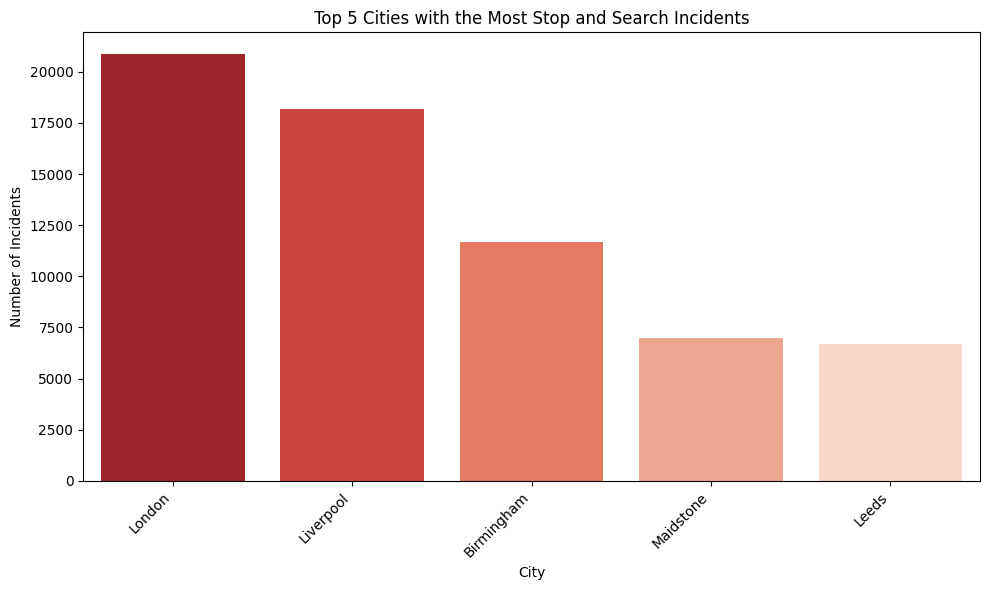

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 5 cities with the most stop and search incidents
top_5_cities = city_counts.head(5)

# Create a bar plot with a red color palette
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_cities.index, y=top_5_cities.values, palette='Reds_r') # Changed palette to Reds_r for reversed (more intense) reds
plt.title('Top 5 Cities with the Most Stop and Search Incidents')
plt.xlabel('City')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

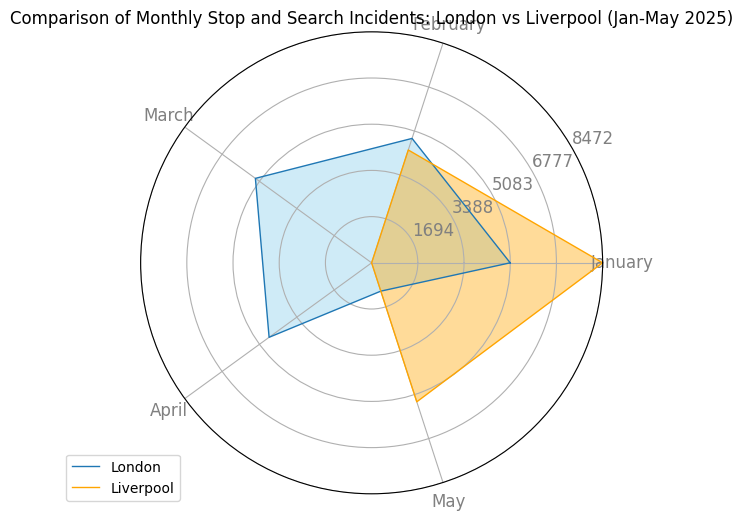

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

# Filter data for London and Liverpool
london_data = combined_stopandsearch_files_df[combined_stopandsearch_files_df['City'] == 'London'].copy()
liverpool_data = combined_stopandsearch_files_df[combined_stopandsearch_files_df['City'] == 'Liverpool'].copy()

# Extract month from Date and convert to string for grouping
london_data['Month'] = london_data['Date'].dt.strftime('%B')
liverpool_data['Month'] = liverpool_data['Date'].dt.strftime('%B')

# Group by month and count incidents
london_monthly_counts = london_data.groupby('Month').size().reindex(['January', 'February', 'March', 'April', 'May'], fill_value=0)
liverpool_monthly_counts = liverpool_data.groupby('Month').size().reindex(['January', 'February', 'March', 'April', 'May'], fill_value=0)


# Prepare data for radar chart
months = london_monthly_counts.index.tolist() # Months are the same for both cities
london_values = london_monthly_counts.values.tolist()
liverpool_values = liverpool_monthly_counts.values.tolist()

# Create angles for the radar chart
angles = [n / float(len(months)) * 2 * pi for n in range(len(months))]
angles += angles[:1] # Complete the circle

# Complete the data for the circle
london_values += london_values[:1]
liverpool_values += liverpool_values[:1]


# Create the radar chart
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], months, color='grey', size=12)

# Determine the maximum value for the y-axis limit (considering both cities)
max_val = max(max(london_values), max(liverpool_values))

plt.yticks(np.linspace(0, max_val, 6)[1:], [str(int(x)) for x in np.linspace(0, max_val, 6)[1:]],
           color='grey', size=12)


plt.ylim(0, max_val)
ax.set_rlabel_position(30)

# Plot London data
ax.plot(angles, london_values, linewidth=1,
        linestyle='solid', label='London')
ax.fill(angles, london_values, 'skyblue', alpha=0.4)

# Plot Liverpool data
ax.plot(angles, liverpool_values, linewidth=1,
        linestyle='solid', label='Liverpool', color='orange')
ax.fill(angles, liverpool_values, 'orange', alpha=0.4)


plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.title('Comparison of Monthly Stop and Search Incidents: London vs Liverpool (Jan-May 2025)')
plt.show()

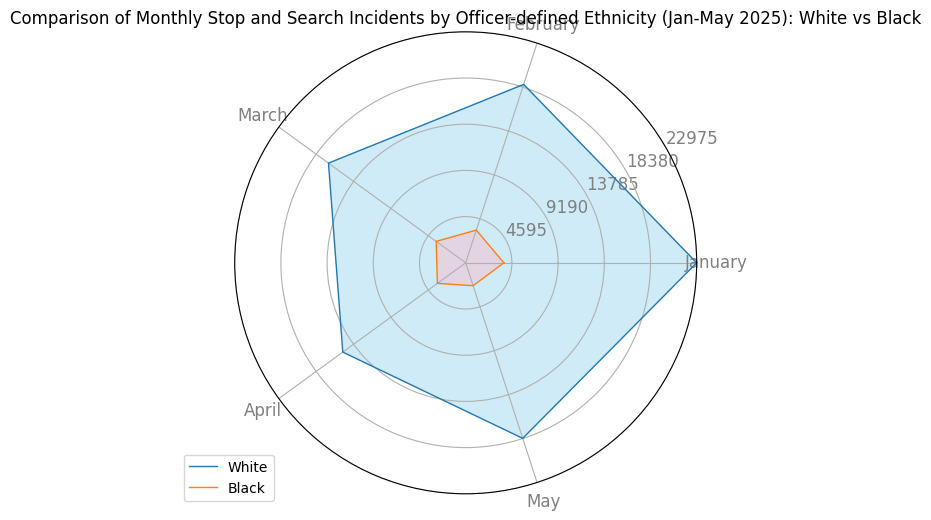

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

# Filter data for White and Black ethnicities (Officer-defined)
white_data = combined_stopandsearch_files_df[combined_stopandsearch_files_df['Officer-defined ethnicity'] == 'White'].copy()
black_data = combined_stopandsearch_files_df[combined_stopandsearch_files_df['Officer-defined ethnicity'] == 'Black'].copy()

# Extract month from Date and convert to string for grouping
white_data['Month'] = white_data['Date'].dt.strftime('%B')
black_data['Month'] = black_data['Date'].dt.strftime('%B')

# Group by month and count incidents
white_monthly_counts = white_data.groupby('Month').size().reindex(['January', 'February', 'March', 'April', 'May'], fill_value=0)
black_monthly_counts = black_data.groupby('Month').size().reindex(['January', 'February', 'March', 'April', 'May'], fill_value=0)


# Prepare data for radar chart
months = white_monthly_counts.index.tolist()
white_values = white_monthly_counts.values.tolist()
black_values = black_monthly_counts.values.tolist()

# Create angles for the radar chart
angles = [n / float(len(months)) * 2 * pi for n in range(len(months))]
angles += angles[:1] # Complete the circle

# Complete the data for the circle
white_values += white_values[:1]
black_values += black_values[:1]


# Create the radar chart
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], months, color='grey', size=12)

# Determine the maximum value for the y-axis limit
max_val = max(max(white_values), max(black_values))

plt.yticks(np.linspace(0, max_val, 6)[1:], [str(int(x)) for x in np.linspace(0, max_val, 6)[1:]],
           color='grey', size=12)


plt.ylim(0, max_val)
ax.set_rlabel_position(30)

# Plot White data
ax.plot(angles, white_values, linewidth=1,
        linestyle='solid', label='White')
ax.fill(angles, white_values, 'skyblue', alpha=0.4)

# Plot Black data
ax.plot(angles, black_values, linewidth=1,
        linestyle='solid', label='Black')
ax.fill(angles, black_values, 'lightpink', alpha=0.4)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.title('Comparison of Monthly Stop and Search Incidents by Officer-defined Ethnicity (Jan-May 2025): White vs Black')
plt.show()

In [26]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display

# -----------------------------------------------------------
# 1. การทำความสะอาด/จัดเตรียมข้อมูล (สำหรับ Time Series และ Map)
# -----------------------------------------------------------

# ตรวจสอบและแปลงคอลัมน์ 'Date' เป็น datetime object
if 'Date' in df.columns:
    # ใช้ .str.split() เพื่อตัด timezone (+00:00) ออกก่อน หากมี
    df['Date'] = pd.to_datetime(df['Date'].astype(str).str.split('+', expand=True)[0], errors='coerce')
    # สร้างคอลัมน์สำหรับวันที่เท่านั้น เพื่อใช้ในการนับรายวัน
    df['Date_Only'] = df['Date'].dt.normalize()

# ---------------------------------------------------
# B. การกระจายตามภูมิศาสตร์ (Geographical Map)
# ---------------------------------------------------
# ต้องมั่นใจว่ามีคอลัมน์ 'Latitude' และ 'Longitude'
if all(col in df.columns for col in ['Latitude', 'Longitude', 'Type']):
    # ใช้การจัดกลุ่มข้อมูลเพื่อทำให้ Map ทำงานเร็วขึ้นและแสดงขนาดจุดตามความถี่
    map_data = df.groupby(['Latitude', 'Longitude', 'Type']).size().reset_index(name='Count')

    fig_map = px.scatter_mapbox(
        map_data,
        lat="Latitude",
        lon="Longitude",
        color="Type", # แยกสีระหว่าง Person search และ Vehicle search
        size="Count", # ขนาดจุดตามจำนวนการตรวจค้นที่พิกัดนั้นๆ
        zoom=10, # ปรับระดับซูมตามความเหมาะสม (อาจต้องปรับเอง)
        mapbox_style="carto-positron", # แนะนำ style นี้เพราะดูสะอาดตา
        title='แผนที่แสดงตำแหน่งการตรวจค้น (Geographical Location of Searches)',
        hover_data={'Latitude': False, 'Longitude': False, 'Count': True}
    )
    fig_map.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
    fig_map.show()
#


# ---------------------------------------------------
# C. การกระจายตามประเภท (Distribution Charts: Type, Day_of_Week)
# ---------------------------------------------------
if 'Type' in df.columns:
    fig_type = px.bar(
        df['Type'].value_counts().reset_index(name='Count'),
        x='Type',
        y='Count',
        title=' จำนวนการตรวจค้นตามประเภท (Searches by Type)',
        labels={'Type': 'ประเภทการตรวจค้น', 'Count': 'จำนวน'},
        color='Type',
        template='plotly_white'
    )
    fig_type.show()

if 'Day_of_Week' in df.columns:
    # กำหนดลำดับวันในสัปดาห์ให้ถูกต้องเพื่อการแสดงผลที่ดี
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    day_counts = df['Day_of_Week'].value_counts().reindex(day_order).fillna(0).reset_index(name='Count')

    fig_day = px.bar(
        day_counts,
        x='Day_of_Week',
        y='Count',
        title='4. จำนวนการตรวจค้นตามวันในสัปดาห์ (Searches by Day of Week)',
        labels={'Day_of_Week': 'วันในสัปดาห์', 'Count': 'จำนวน'},
        color='Day_of_Week',
        category_orders={'Day_of_Week': day_order},
        template='plotly_white'
    )
    fig_day.show()

In [27]:
compared_police_eth = combined_stopandsearch_files_df.groupby('Officer-defined ethnicity')['Type'].count().reset_index()
compared_police_eth

,Officer-defined ethnicity,Type
0,Asian,13129
1,Black,16719
2,Mixed,717
3,Other,3628
4,Unknown,9640
5,White,91967


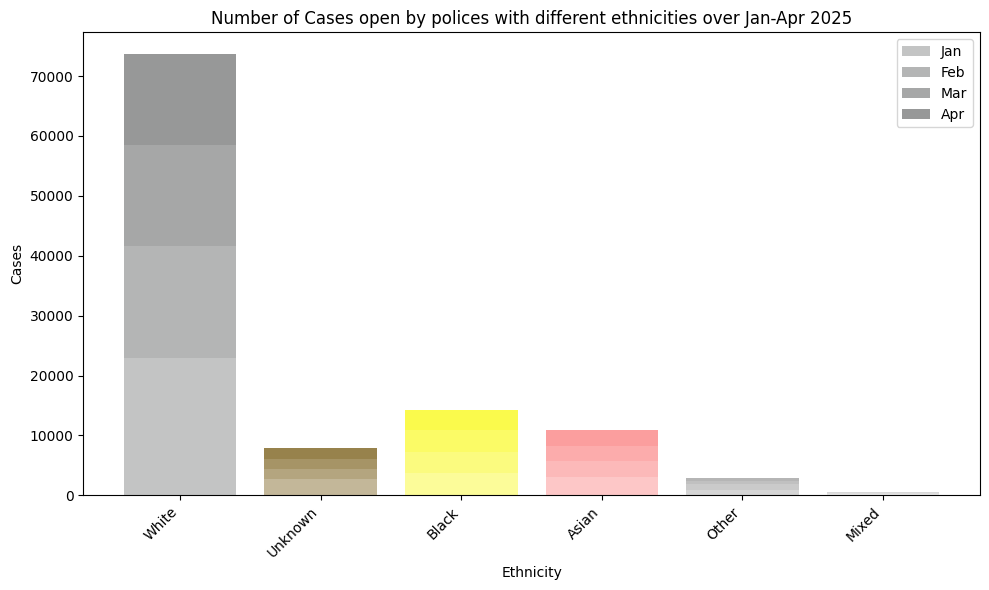

In [28]:
import matplotlib.pyplot as plt

# Filter data for each month and group by 'Officer-defined ethnicity'
jan_data = combined_stopandsearch_files_df[combined_stopandsearch_files_df['Date'].dt.month == 1]
compared_police_eth1 = jan_data.groupby('Officer-defined ethnicity')['Type'].count().reset_index()

feb_data = combined_stopandsearch_files_df[combined_stopandsearch_files_df['Date'].dt.month == 2]
compared_police_eth2 = feb_data.groupby('Officer-defined ethnicity')['Type'].count().reset_index()

mar_data = combined_stopandsearch_files_df[combined_stopandsearch_files_df['Date'].dt.month == 3]
compared_police_eth3 = mar_data.groupby('Officer-defined ethnicity')['Type'].count().reset_index()

apr_data = combined_stopandsearch_files_df[combined_stopandsearch_files_df['Date'].dt.month == 4]
compared_police_eth4 = apr_data.groupby('Officer-defined ethnicity')['Type'].count().reset_index()

# Merge the dataframes to ensure all ethnicities are present in each month's data
all_ethnicities = combined_stopandsearch_files_df['Officer-defined ethnicity'].unique()
ethnicities_df = pd.DataFrame({'Officer-defined ethnicity': all_ethnicities})

compared_police_eth1 = pd.merge(ethnicities_df, compared_police_eth1, on='Officer-defined ethnicity', how='left').fillna(0)
compared_police_eth2 = pd.merge(ethnicities_df, compared_police_eth2, on='Officer-defined ethnicity', how='left').fillna(0)
compared_police_eth3 = pd.merge(ethnicities_df, compared_police_eth3, on='Officer-defined ethnicity', how='left').fillna(0)
compared_police_eth4 = pd.merge(ethnicities_df, compared_police_eth4, on='Officer-defined ethnicity', how='left').fillna(0)


# Create the stacked bar chart
plt.figure(figsize=(10, 6)) # Adjust figure size if needed

plt.bar(compared_police_eth1['Officer-defined ethnicity'], compared_police_eth1['Type']
        , color=[[107/255,108/255,109/255,0.4], [107/255,77/255,0,0.4], [249/255,249/255,0,0.4], [250/255,117/255,117/255,0.4], [150/255,150/255,150/255,0.4], [200/255,200/255,200/255,0.4]] # Added colors for Mixed and Unknown
        , label='Jan')

plt.bar(compared_police_eth2['Officer-defined ethnicity'], compared_police_eth2['Type']
        , bottom = compared_police_eth1['Type']
        , color=[[107/255,108/255,109/255,0.5], [107/255,77/255,0,0.5], [249/255,249/255,0,0.5], [250/255,117/255,117/255,0.5], [150/255,150/255,150/255,0.5], [200/255,200/255,200/255,0.5]] # Added colors for Mixed and Unknown
        , label='Feb')

plt.bar(compared_police_eth3['Officer-defined ethnicity'], compared_police_eth3['Type']
        , bottom = compared_police_eth1['Type'] + compared_police_eth2['Type']
        , color=[[107/255,108/255,109/255,0.6], [107/255,77/255,0,0.6], [249/255,249/255,0,0.6], [250/255,117/255,117/255,0.6], [150/255,150/255,150/255,0.6], [200/255,200/255,200/255,0.6]] # Added colors for Mixed and Unknown
        , label='Mar')

plt.bar(compared_police_eth4['Officer-defined ethnicity'], compared_police_eth4['Type']
        , bottom = compared_police_eth1['Type'] + compared_police_eth2['Type']+ compared_police_eth3['Type']
        , color=[[107/255,108/255,109/255,0.7], [107/255,77/255,0,0.7], [249/255,249/255,0,0.7], [250/255,117/255,117/255,0.7], [150/255,150/255,150/255,0.7], [200/255,200/255,200/255,0.7]] # Added colors for Mixed and Unknown
        , label='Apr')

plt.xlabel('Ethnicity')
plt.ylabel('Cases')
plt.legend()
plt.title('Number of Cases open by polices with different ethnicities over Jan-Apr 2025')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [29]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from IPython.display import display

# -----------------------------------------------------------
# 1. การคำนวณอัตราความสำเร็จ
# -----------------------------------------------------------

# ตรวจสอบว่าคอลัมน์ที่จำเป็นมีอยู่หรือไม่
required_column = 'Outcome linked to object of search'

if required_column in combined_stopandsearch_files_df.columns:

    # 1.1 นับจำนวนการตรวจค้นทั้งหมด
    total_searches = len(combined_stopandsearch_files_df)

    # 1.2 นับจำนวนครั้งที่ 'Outcome linked to object of search' เป็น True
    # การแปลงเป็น True/False ก่อนนับจะช่วยให้มั่นใจว่านับเฉพาะค่าที่เป็น True เท่านั้น
    successful_searches = combined_stopandsearch_files_df[combined_stopandsearch_files_df[required_column] == True].shape[0]

    # 1.3 คำนวณอัตราความสำเร็จเป็นเปอร์เซ็นต์
    if total_searches > 0:
        success_rate = (successful_searches / total_searches) * 100
        success_rate_rounded = round(success_rate, 2)

        print(f"✅ จำนวนการตรวจค้นทั้งหมด: {total_searches}")
        print(f"✅ จำนวนการตรวจค้นที่สำเร็จ (Outcome Linked): {successful_searches}")
        print(f"✅ อัตราความสำเร็จ: {success_rate_rounded}%")

        # -----------------------------------------------------------
        # 2. การสร้าง Gauge Chart (มาตรวัด)
        # -----------------------------------------------------------

        fig_gauge = go.Figure(go.Indicator(
            mode = "gauge+number",
            value = success_rate_rounded,
            title = {'text': "<b>อัตราความสำเร็จของการตรวจค้น</b><br><span style='font-size:0.8em;color:gray'>(Outcome Linked to Object of Search = True)</span>"},
            domain = {'x': [0, 1], 'y': [0, 1]},
            gauge = {
                'shape': "angular",
                'axis': {'range': [0, 100], 'tickwidth': 1, 'tickcolor': "darkblue"},
                'bar': {'color': "darkblue"},
                'steps': [
                    # กำหนดสีตามระดับความสำเร็จ
                    {'range': [0, 25], 'color': "red"},       # ต่ำกว่า 25% (ต่ำมาก)
                    {'range': [25, 50], 'color': "orange"},    # 25% - 50% (ปานกลาง/ต้องปรับปรุง)
                    {'range': [50, 75], 'color': "lightgreen"},# 50% - 75% (ดี)
                    {'range': [75, 100], 'color': "green"}   # 75% ขึ้นไป (ยอดเยี่ยม)
                ],
                'threshold': {
                    'line': {'color': "black", 'width': 4},
                    'thickness': 0.75,
                    'value': success_rate_rounded # ชี้ไปยังค่าที่คำนวณได้
                }
            }
        ))

        fig_gauge.update_layout(title_x=0.5, margin=dict(l=20, r=20, t=50, b=20))
        fig_gauge.show()
        #

    else:
        print("💡 ข้อมูลไม่มีแถว (Total Searches = 0) จึงไม่สามารถคำนวณอัตราความสำเร็จได้")

else:
    print(f"❌ ERROR: ไม่พบคอลัมน์ '{required_column}' ใน DataFrame โปรดตรวจสอบชื่อคอลัมน์")

✅ จำนวนการตรวจค้นทั้งหมด: 135800
✅ จำนวนการตรวจค้นที่สำเร็จ (Outcome Linked): 35079
✅ อัตราความสำเร็จ: 25.83%


In [30]:
import pandas as pd
import plotly.express as px

# -----------------------------------------------------------
# 1. การเตรียมข้อมูล
# -----------------------------------------------------------
# นับจำนวนแต่ละประเภทของ 'Outcome'
outcome_counts = df['Outcome'].value_counts().reset_index()
outcome_counts.columns = ['Outcome', 'Count']

# -----------------------------------------------------------
# 2. การสร้าง Donut Chart
# -----------------------------------------------------------
fig_donut = px.pie(
    outcome_counts,
    values='Count',
    names='Outcome',
    title='1. การกระจายของผลลัพธ์การตรวจค้น (Outcome Distribution)',
    hole=.4,  # กำหนดขนาดรูตรงกลางเพื่อสร้าง Donut Chart
    template='plotly_white',
    # ใช้ชุดสีที่อ่านง่าย
    color_discrete_sequence=px.colors.qualitative.Bold
)

# ปรับรูปแบบข้อความบนกราฟ
fig_donut.update_traces(
    textposition='inside',
    textinfo='percent+label'
)

fig_donut.show()

In [31]:
import pandas as pd
import plotly.express as px

# -----------------------------------------------------------
# 1. การเตรียมข้อมูล
# -----------------------------------------------------------
# นับจำนวนแต่ละประเภทของ 'Outcome'
outcome_counts = combined_stopandsearch_files_df['Outcome'].value_counts().reset_index()
outcome_counts.columns = ['Outcome', 'Count']

# Filter out the 'Unknown' outcome
filtered_outcome_counts = outcome_counts[outcome_counts['Outcome'] != 'Unknown']

# Get the top 3 outcomes from the filtered data
top_3_outcomes = filtered_outcome_counts.head(3)

# -----------------------------------------------------------
# 2. การสร้าง Donut Chart
# -----------------------------------------------------------
fig_donut = px.pie(
    top_3_outcomes, # Use the top 3 filtered data
    values='Count',
    names='Outcome',
    title='1. การกระจายของผลลัพธ์การตรวจค้น (Outcome Distribution) - Top 3 (Excl. Unknown)',
    hole=.4,  # กำหนดขนาดรูตรงกลางเพื่อสร้าง Donut Chart
    template='plotly_white',
    # ใช้ชุดสีที่อ่านง่าย
    color_discrete_sequence=px.colors.qualitative.Bold
)

# ปรับรูปแบบข้อความบนกราฟ
fig_donut.update_traces(
    textposition='inside',
    textinfo='percent+label'
)

fig_donut.show()

# โหลดลง Google Sheet

In [ ]:
# TODO: Authenticate กับ Google
# Hint: ใช้ from google.colab import auth
#       auth.authenticate_user()
#       แล้ว authorize กับ gspread

# เขียนโค้ดที่นี่
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

print("✅ Google Authentication สำเร็จ")

In [ ]:
def upload_to_sheet(spreadsheet, df, sheet_name):
    """อัปโหลด DataFrame ไปยัง Google Sheet"""
    # TODO: เขียนโค้ดอัปโหลด
    # Hint: 1. หา/สร้าง worksheet
    #       2. ล้างข้อมูลเดิม (worksheet.clear())
    #       3. แปลง DataFrame เป็น list (ระวัง date objects!)
    #       4. อัปโหลด (worksheet.update())
    try:
        worksheet = spreadsheet.worksheet(sheet_name)
    except gspread.WorksheetNotFound:
        worksheet = spreadsheet.add_worksheet(title=sheet_name, rows="100", cols="20")

    # Clear existing data
    worksheet.clear()

    # Convert DataFrame to list of lists (including header)
    # Convert any date objects to string to avoid gspread errors
    data_to_upload = [df.columns.values.tolist()] + df.fillna('').astype(str).values.tolist()


    # Upload data
    worksheet.update(values=data_to_upload)
    print(f"✅ อัปโหลด '{sheet_name}' สำเร็จ")

# TODO: อัปโหลดทั้ง 5 warehouses
# เขียนโค้ดที่นี่
# Specify the title of your Google Sheet
spreadsheet_title = 'Stop and Search Data' # You can change this title

# Open the spreadsheet (create if it doesn't exist)
try:
    sh = gc.open(spreadsheet_title)
    print(f"✅ เปิด Spreadsheet '{spreadsheet_title}' สำเร็จ")
except gspread.SpreadsheetNotFound:
    sh = gc.create(spreadsheet_title)
    print(f"✅ สร้าง Spreadsheet '{spreadsheet_title}' สำเร็จ")

# Upload the stop and search data
upload_to_sheet(sh, combined_stopandsearch_files_df, 'Stop and Search Data')

print("\n✅ อัปโหลดข้อมูลทั้งหมดไปยัง Google Sheets สำเร็จ")